In [89]:
import pathlib
from pathlib import Path
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['lines.markersize'] = 10

In [45]:
subset0_dir = '/mnt/SSD0/mahesh-home/xrayto3D-benchmark/2D-3D-Reconstruction-Datasets/lidc/raw/img/subset0_outer/tmp/subset0/vertebrae_segmentation'
subset_dirs = [f'/mnt/SSD0/mahesh-home/xrayto3D-benchmark/2D-3D-Reconstruction-Datasets/lidc/raw/img/subset{i}_outer/tmp/subset{i}/vertebrae_segmentation' for i in range(1,10)]

In [58]:
subset0_seg_paths = Path(subset0_dir).glob('*.nii.gz')
subset_seg_paths = []
for s in subset_dirs:
    subset_seg_paths.extend(Path(s).glob('*.nii.gz'))

In [16]:
def get_stats(img_path):
    img = sitk.ReadImage(img_path)
    fltr = sitk.LabelShapeStatisticsImageFilter()
    fltr.Execute(img)
    return fltr

In [64]:
vertebra_count = []
for p in list(subset_seg_paths):
    l = get_stats(str(p)).GetLabels()
    vertebra_count.append(l)

[(8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20),
 (9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21),
 (8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22),
 (8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19),
 (8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20),
 (9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21),
 (9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19),
 (8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21),
 (9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21),
 (8, 9, 10, 11, 12, 13, 14, 15, 16, 17),
 (9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19),
 (9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21),
 (9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20),
 (7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21),
 (8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20),
 (9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20),
 (8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18),
 (8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18),
 (9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20),
 (8, 9, 10, 11, 12, 13, 14, 15, 1

In [75]:
vertebra_label = []
for i in range(1,24):
    if i <= 7:
        vertebra_label.append(f'C{i}')
    elif i>7 and i<= 19:
        vertebra_label.append(f'T{i-7}')
    else:
        vertebra_label.append(f'L{i-19}')

In [76]:
len(vertebra_label)

23

In [77]:
vertebra_count_dict = { label:0 for label in vertebra_label}
for row in vertebra_count:
    for item in row:
        try:
            vertebra_count_dict[vertebra_label[item-1]] += 1
        except:
            print(item)
print(vertebra_count_dict)

28
28
28
28
{'C1': 0, 'C2': 0, 'C3': 0, 'C4': 0, 'C5': 1, 'C6': 5, 'C7': 48, 'T1': 506, 'T2': 764, 'T3': 769, 'T4': 769, 'T5': 770, 'T6': 769, 'T7': 769, 'T8': 769, 'T9': 769, 'T10': 769, 'T11': 754, 'T12': 588, 'L1': 489, 'L2': 191, 'L3': 30, 'L4': 3}


In [93]:
np.sum(count)

9532

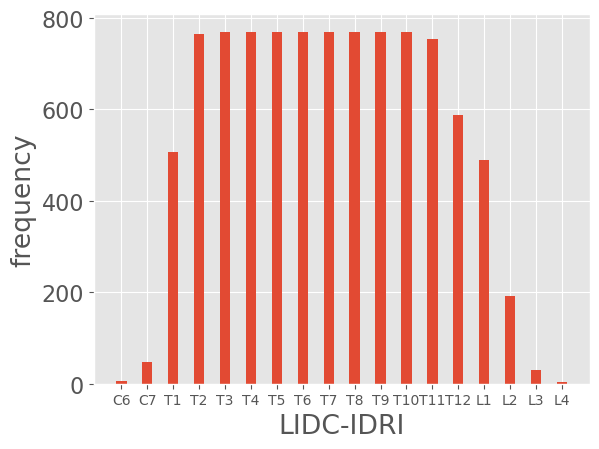

In [92]:
labels = list(vertebra_count_dict.keys())
count = list(vertebra_count_dict.values())
# creating the bar plot
plt.bar(labels[5:], count[5:], 
        width = 0.4)
plt.xlabel('LIDC-IDRI')
plt.ylabel('frequency')
plt.xticks(fontsize=10)
plt.savefig('lidc_stats_plot.pdf')